# Small world graphs

In [3]:
import random
import networkx as nx
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from itertools import product
import itertools

### Volado

In [4]:
def volado(p):
    return random.random() < p

### Grafo k-regular

In [5]:
def k_graph(n: int, k: int):
    
    if k > n-1 or (n*k)%2!=0:
        raise NotImplementedError()
        
    V = range(n)
    E = list()
    G = nx.Graph()
    G.add_nodes_from(V)

    for i in V:
        for j in range(k):
            E.append(i)

    while E:
        u = E.pop(random.randint(0,len(E)-1))
        v = E.pop(random.randint(0,len(E)-1))
        descartadas = []
        while u == v or G.has_edge(u,v):
            descartadas.append(v)
            v = E.pop(random.randint(0,len(E)-1))
        """print("\n")
        print(E)
        print("\n")
        print(u,v)"""
        E.extend(descartadas)
        #print("\n")
        #print(E)
        G.add_edge(u,v)
    return G

/home/ackerman/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


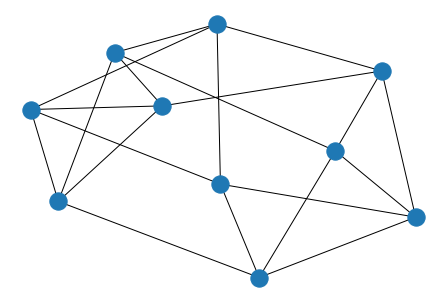

In [6]:
B = k_graph(10, 4)
nx.draw(B)

### Rejilla-anillo(los k vecinos sean los k mas cercanos) 

In [7]:
def rejilla_anillo(n: int, h: int):
    G = nx.Graph()
    G.add_nodes_from(range(n))
        
    for u in range(n):
        #print(u)
        for v in range(u + 1, u + h):
            #print(u,v)
            G.add_edge(u, v % n)

    return G

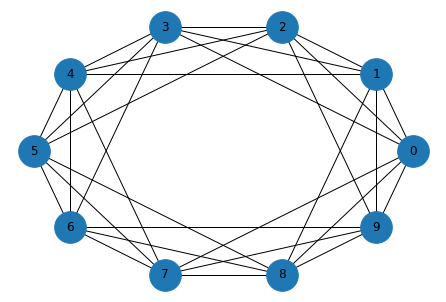

In [8]:
B = rejilla_anillo(10, 4)
nx.draw_circular(B, node_size=1000, with_labels=True)

### Reconexión(reconectar un grafo dado)

In [9]:
def reconectar(G, p):
    nodos = set(G)                                                    #Conjunto de todos los vertices
    for u, v in list(G.edges()):                                            #Para cada par de aristas
        if volado(.5):
            u, v = v, u
            
        if volado(p):
            try:
                posibilidades = list(nodos - {u} - set(G.neighbors(u)))   #listamos todos los posibles vecinos
                                                                          #de u no conectados con u
                vec_elegido = random.choice(posibilidades)                #Elegimos uno al azar
                G.remove_edge(u, v)                                        #Eliminamos la arista de u a v
                G.add_edge(u, vec_elegido)                                 #Agregamos la arista de u al nuevo vecino
            except:
                continue
    return G

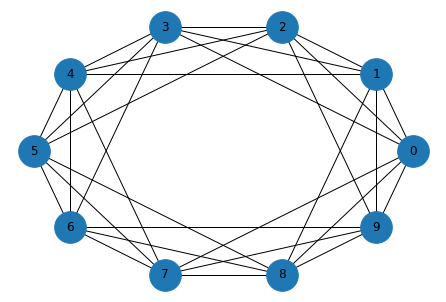

In [10]:
B = rejilla_anillo(10, 4)
nx.draw_circular(B, node_size=1000, with_labels=True)

[(0, 1), (0, 7), (0, 9), (0, 4), (0, 2), (0, 6), (0, 8), (1, 8), (1, 9), (1, 7), (1, 6), (1, 3), (1, 5), (2, 7), (2, 6), (3, 5), (3, 7), (3, 8), (3, 4), (3, 9), (4, 5), (4, 6), (4, 8), (4, 9), (5, 6), (5, 7), (5, 9), (6, 7), (7, 8), (8, 9)]


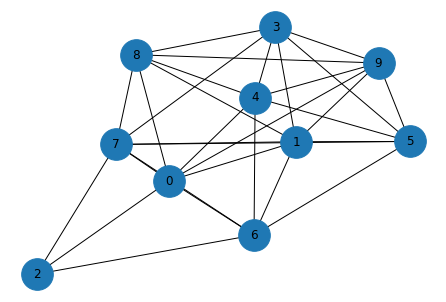

In [12]:
C = reconectar(B, .4)
print(C.edges())
nx.draw(C, node_size=1000, with_labels=True)

### Coeficiente de clusterización de un vertice

In [13]:
def vertex_clustering(G, u):
    vecinos = 0
    vecinos_u = list(G.neighbors(u))
    k = len(vecinos_u)
    
    if k < 2:
        return np.nan
    
    total_posibles = (k * (k - 1)) / 2
    posibles_e = list(product(vecinos_u, vecinos_u))
    
    for v, w in posibles_e:
        if G.has_edge(v, w):
            #print(v,w)
            vecinos += 1
            
    return vecinos/total_posibles

In [14]:
vertex_clustering(C, 3)

1.4666666666666666

### Coeficente de clusterización del grafo

In [15]:
def coef_clust(G):
    coef = [vertex_clustering(G, u) for u in G]
    return np.nanmean(coef)

In [16]:
coef_clust(C)

1.3752380952380954

### Cola doblemente ligada

In [245]:
class Deque:
    def __init__(self):
        self.items = []

    def no_vacia(self):
        return self.items != []

    def agregarFinal(self, item):
        self.items.append(item)

    def agregarInicio(self, item):
        self.items.insert(0,item)

    def quitarFinal(self):
        return self.items.pop()

    def quitarInicio(self):
        return self.items.pop(0)

### Recorrido en anchura

In [246]:
def recorrido_anchura(G, descubrir, finalizar):
    
    def visitar(u):
        d = Deque()
        d.agregarInicio(u)
        while d.no_vacia():
            s = d.quitarInicio()
            if s not in visitados:
                descubrir(s)
                visitados.add(s)                    #Agregamos a visitados
                for node in G.neighbors(s):         #Para cada nodo vecino a encontrado
                    if node not in visitados:       #Si no hay sido encontrado
                        d.agregarFinal(node)     
        finalizar(u)  
        
    visitados = set()
    for r in G.nodes:
        if r not in visitados:
            visitar(r)

In [247]:
# Ejemplo:
def descubrir(u):
    print(f'Descubrir nodo {u}')

def finalizar(u):
    print(f'Finalizar nodo {u}')

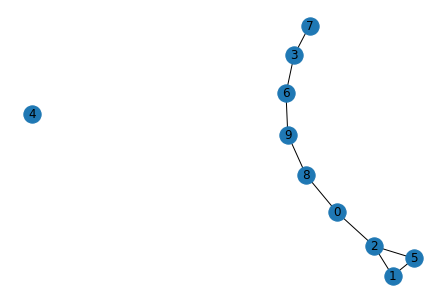

In [248]:
G = nx.erdos_renyi_graph(10, 0.1, seed=42)
nx.draw(G, with_labels=True)

In [249]:
recorrido_anchura(G, descubrir, finalizar)

Descubrir nodo 0
Descubrir nodo 2
Descubrir nodo 8
Descubrir nodo 1
Descubrir nodo 5
Descubrir nodo 9
Descubrir nodo 6
Descubrir nodo 3
Descubrir nodo 7
Finalizar nodo 0
Descubrir nodo 4
Finalizar nodo 4


In [250]:
def dijkstra(G, s):
    dist = {s: 0}
    d = Deque()
    d.agregarInicio(s)
    while d.no_vacia():
        nodo = d.quitarInicio()
        nueva_dist = dist[nodo] + 1
        vecinos = set(G.neighbors(nodo)).difference(dist)
        for v in vecinos:
            dist[v] = nueva_dist
            for node in vecinos:
                d.agregarFinal(node)
    return dist

In [251]:
dijkstra(G, 8)

{8: 0, 0: 1, 9: 1, 2: 2, 6: 2, 1: 3, 5: 3, 3: 3, 7: 4}

### Caminos caracteriscos

In [252]:
def largo_caminos(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist

In [254]:
def largo_caracteristico(G):
    return np.mean(list(largo_caminos(G)))

### Grafo de Wats-Strogartz

In [255]:
def grafo_ws(n: int, k: int, p:float):
    ws = rejilla_anillo(n, k)
    reconectar(ws, p)
    return ws

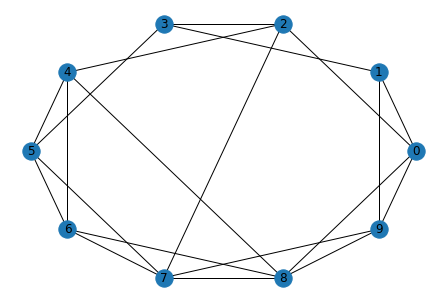

In [256]:
G = grafo_ws(10, 3, 0.1)
nx.draw_circular(G, with_labels=True)

In [227]:
def grafo_prueba(n, k, p):
    ws = grafo_ws(n, k, p)
    mpl = largo_caracteristico(ws)
    cc = coef_clust(ws)
    return mpl, cc

In [183]:
grafo_prueba(10, 3, 0.2)

(1.48, 0.9333333333333332)

In [184]:
def recorrido_anchura_explicativo(G, descubrir, finalizar):
    
    def visitar(u):
        descubiertos = {u}
        niv_actual = [u]
        while niv_actual:
            niv_siguiente = []
            for v in niv_actual:
                    for w in G.neighbors(v):
                        if w not in descubiertos:
                            niv_siguiente.append(w)
                            descubiertos.add(w)
            niv_actual = niv_siguiente
        
    visitados = set()
    for r in G.nodes:
        if r not in visitados:
            visitar(r)

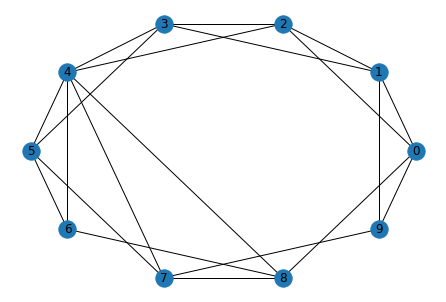

In [196]:
G = grafo_ws(10, 3, 0.2)
nx.draw_circular(G, with_labels=True)

In [65]:
recorrido_anchura_explicativo(G, descubrir, finalizar)

In [283]:
def distancia_media(G):
    dist = dict(nx.shortest_path_length(G))
    return np.mean([dist[u][v] for (u, v) in itertools.combinations(G.nodes, 2)])

def coef_agrupamiento(G):
    return np.mean(list(nx.clustering(G).values()))

In [284]:
def evento(n, k, p):
    return distancia_media(G), coef_agrupamiento(G)

In [302]:
def run_experiment(ps, n, k, iters = 20):
    res = []
    for p in ps:
        t = [evento(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        res.append(means)
    return np.array(res)

In [312]:
ps =  np.logspace(0, 1)
resultados /= resultados.mean(axis=0)
resultados = run_experiment(ps, 10, 4)
L, C = np.transpose(resultados)

Text(0.5, 1.0, 'Normalized clustering coefficient and path length')

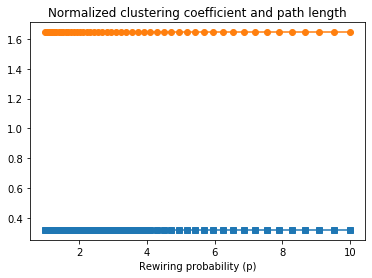

In [313]:
plt.plot(ps, C, 's-')
plt.plot(ps, L, 'o-')
plt.xlabel('Rewiring probability (p)')
plt.title('Normalized clustering coefficient and path length')